## __Data Exploration Using SMOTE__
Let's see how to prepare, explore, and visualize the data. Also, let's learn how to train the logistic model and evaluate the data.

## Step 1: Import the Required Libraries and Read the Dataset

- Let's start by importing the required libraries, such as Pandas, Matplotlib.pyplot, and Numpy.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

- From the local drive, upload and read the __cuisines__ dataset.

In [4]:
df  = pd.read_csv('cuisines.csv')

- The head() function gives the first five rows of the data.

In [7]:
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


- Let's see the data types using the info() method.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


__Observation__:

- The dataset has 385 entries, with 384 numerical and 1 categorical entry.

## Step 2: Visualize Cuisine Distribution and Create Cuisine-Specific DataFrames

- Plot the distribution of cuisines. Use the bar graph to plot the value counts of different cuisines.


<Axes: ylabel='cuisine'>

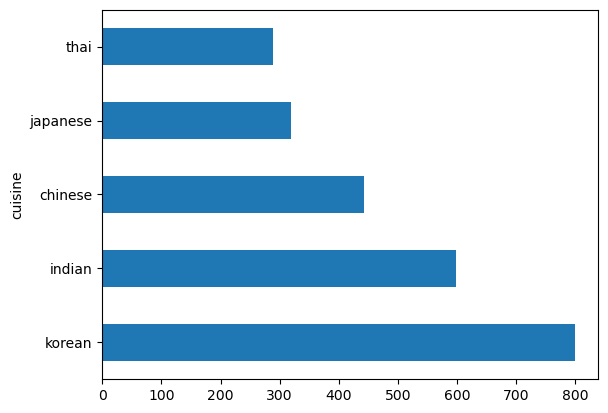

In [9]:
df.cuisine.value_counts().plot.barh()

- Create a DataFrame for each cuisine
- Print the shape of each DataFrame to get the number of rows and columns in each DataFrame

In [10]:
thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


Step 3: Create a Function to Analyze Ingredient Usage

- Define a function to create an ingredient DataFrame
- Create a function, create_ingredient(), in Python to create an ingredient DataFrame
- This function will remove an unnecessary column and count the ingredients.

In [11]:
def create_ingredient_df(df):
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False,
    inplace=False)
    return ingredient_df

- Check and plot the top 10 ingredients for each cuisine

<Axes: >

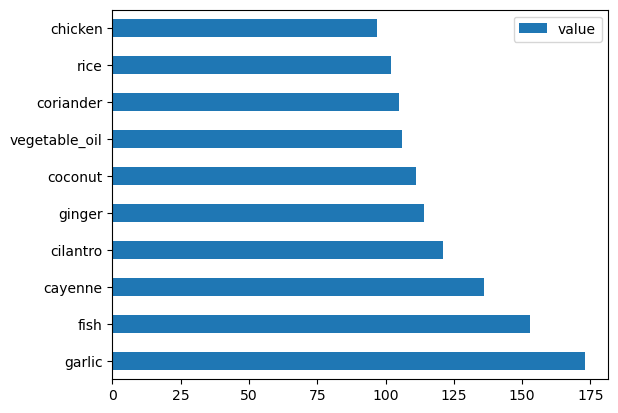

In [12]:
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh()

<Axes: >

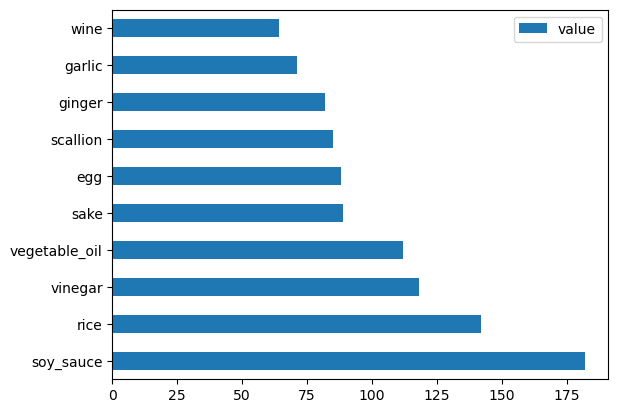

In [13]:
japanese_ingredient_df = create_ingredient_df(japanese_df)
japanese_ingredient_df.head(10).plot.barh()

<Axes: >

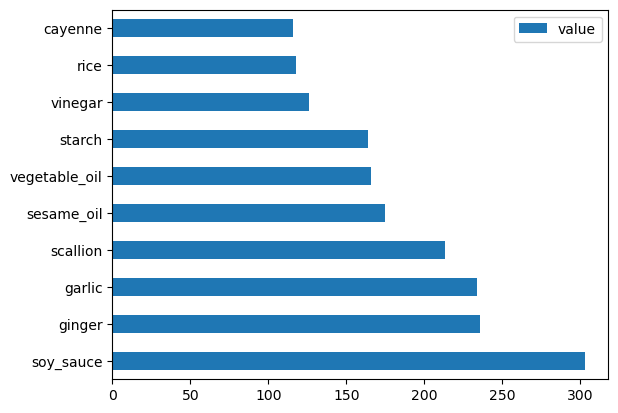

In [14]:
chinese_ingredient_df = create_ingredient_df(chinese_df)
chinese_ingredient_df.head(10).plot.barh()

<Axes: >

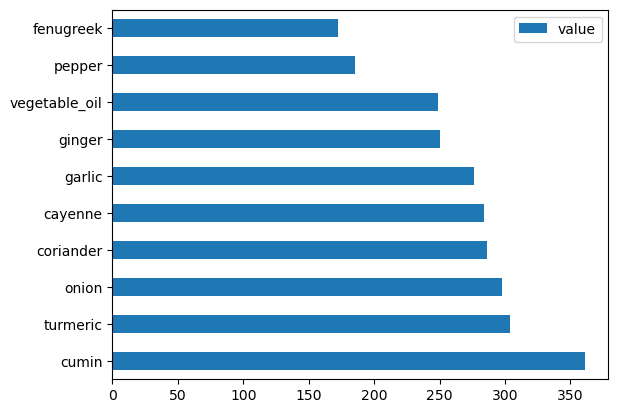

In [15]:
indian_ingredient_df = create_ingredient_df(indian_df)
indian_ingredient_df.head(10).plot.barh()

<Axes: >

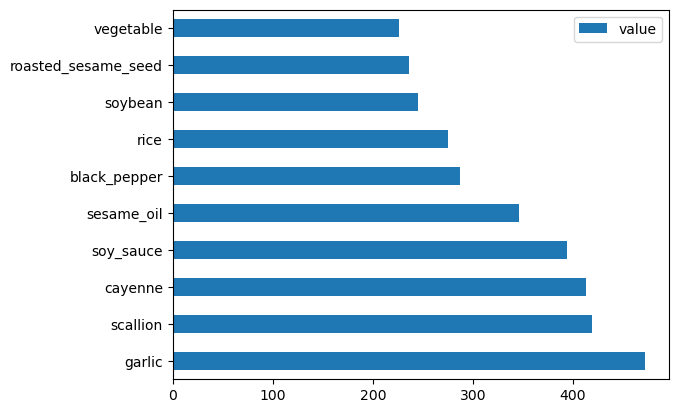

In [16]:
korean_ingredient_df = create_ingredient_df(korean_df)
korean_ingredient_df.head(10).plot.barh()

- It is apparent that there are common ingredients in each cuisine.
- They can be dropped so that they do not influence the model.

In [18]:
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
labels_df = df.cuisine
feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


__Observation:__
- You can also see that all the cuisines here have different numbers of observations.
- This is called an imbalanced dataset.
- To balance this, we can use a technique called SMOTE.

## Step 4: Prepare the Data for Classification


- Import and use oversampling from SMOTE
- Once imported, transform the same using the features and labels df.


In [19]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

- Check out the new value counts for each cuisine
- Compare the new counts with the old counts

In [20]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

new label count: cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64
old label count: cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


__Observation__:
- You can see that all the cuisines have 799 rows now.

## Step 5: Train a Logistic Regression Model

- Import the libraries for logistic regression model



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np

- Split the data into training and testing sets in the ratio 70:30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(transformed_feature_df, transformed_label_df, test_size=0.3)

- Train the logistic regression model and calculate the accuracy.
- The model **lr** is fitted to the variable model.
- Next, accuracy needs to be calculated using the method model.

In [ ]:
lr = LogisticRegression(multi_class='ovr',solver='liblinear')
model = lr.fit(X_train, np.ravel(y_train))

accuracy = model.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

__Observation:__
- From the results, it is apparent that the accuracy is 78 percent.


## Step 6: Make Predictions and Analyze the Results

- Now, let's make a prediction for a specific test instance.
- Let's calculate and print the probabilities for each class.
- Display the top predicted cuisines


In [ ]:
print(f'ingredients: {X_test.iloc[50][X_test.iloc[50]!=0].keys()}')
print(f'cuisine: {y_test.iloc[50]}')

- In the above code, we are entering one ingredient as an input. The prediction is displayed as thai, along with the ingredients for the same.

- Let's test what our model will predict.
- Since we want the probability, we can use the predict_proba method.
- Let's store the value in the resultdf DataFrame.
- Finally, let's sort the values by index values.





In [ ]:
test= X_test.iloc[50].values.reshape(-1, 1).T
proba = model.predict_proba(test)
classes = model.classes_
resultdf = pd.DataFrame(data=proba, columns=classes)

topPrediction = resultdf.T.sort_values(by=[0], ascending = [False])
topPrediction.head()

__Observation:__
 - As you can see, our model can predict thai as the cuisine with high probability.

## Step 7: Evaluate the Model

- Generate a classification report to evaluate the model's performance
- Now, let's check the classification report using the method classification_report.


In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

__Observation:__
- As we already know, the accuracy is calculated to be 79 percent.